In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
from datetime import * 
import requests
import json

- 스마트서울 도시데이터 센서(S-DoT) 유동인구 측정정보
- https://data.seoul.go.kr/dataList/OA-15964/S/1/datasetView.do

# 유동인구 데이터 불러오기

In [4]:
# train: 2022-01-01 00:00 ~ 2022-03-31 23:00 => 89일
# test: 2022-04-01 00:00 ~ 2022-04-30 23:00 => 29일
# print(date(2022,3,31) - date(2022,1,1))
# print(date(2022,4,30) - date(2022,4,1))

start = date(2021,12,27)

full_data = pd.DataFrame()
for i in range(0,130,7):
    try:
        s = start + timedelta(days=i)
        ss = s.strftime('%Y.%m.%d')    
        e = s + timedelta(days=6)
        ee = e.strftime('%m.%d')

        filename = 'S-DoT_WALK_' + str(ss) + '-' + str(ee) + '.csv'
        data = pd.read_csv('./sdot_data/' + filename, encoding='cp949')
        print(filename)
        full_data = pd.concat([full_data, data], axis=0)
    except:
        pass

S-DoT_WALK_2021.12.27-01.02.csv
S-DoT_WALK_2022.01.03-01.09.csv
S-DoT_WALK_2022.01.10-01.16.csv
S-DoT_WALK_2022.01.17-01.23.csv
S-DoT_WALK_2022.01.24-01.30.csv
S-DoT_WALK_2022.01.31-02.06.csv
S-DoT_WALK_2022.02.07-02.13.csv
S-DoT_WALK_2022.02.14-02.20.csv
S-DoT_WALK_2022.02.21-02.27.csv
S-DoT_WALK_2022.02.28-03.06.csv
S-DoT_WALK_2022.03.07-03.13.csv
S-DoT_WALK_2022.03.14-03.20.csv
S-DoT_WALK_2022.03.21-03.27.csv
S-DoT_WALK_2022.03.28-04.03.csv
S-DoT_WALK_2022.04.04-04.10.csv
S-DoT_WALK_2022.04.11-04.17.csv
S-DoT_WALK_2022.04.18-04.24.csv
S-DoT_WALK_2022.04.25-05.01.csv


In [5]:
full_data

기관 명         모델명   시리얼  서버타입          사이트명                 방문자수  \
서울시 SDOT001  4027  00Original  4027     3  202112260000  2021-12-27 00:00:02   
    SDOT001  4033  00Original  4033     4  202112260000  2021-12-27 00:00:06   
    SDOT001  4041  00Original  4041     0  202112260000  2021-12-27 00:00:11   
    SDOT001  4015  00Original  4015    10  202112260000  2021-12-27 00:00:16   
    SDOT001  4031  00Original  4031     1  202112260000  2021-12-27 00:00:22   
...           ...         ...   ...   ...           ...                  ...   
    SDOT001  4030  00Original  4030     4  202205012350  2022-05-01 23:57:23   
    SDOT001  4007  00Original  4007     4  202205012350  2022-05-01 23:57:29   
    SDOT001  4040  00Original  4040    27  202205012350  2022-05-01 23:57:43   
    SDOT001  4042  00Original  4042     4  202205012350  2022-05-01 23:57:47   
    SDOT001  4025  00Original  4025     3  202205012350  2022-05-01 23:57:52   

             날짜  등록일자  
서울시 SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
...          ..   ...  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  
    SDOT001 NaN   NaN  

[1181159 rows x 8 columns]

In [6]:
def prep(df):
    df.reset_index(drop=True, inplace=True)
    df1 = df.iloc[:,:-2]
    df1.columns = df.columns[2:]
    df1 = df1[['시리얼', '날짜', '방문자수']]
    df1.rename({'시리얼':'사이트명'}, axis=1, inplace=True)
    df1['날짜'] = df1['날짜'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d%H%M'))

    return df1

In [7]:
df = prep(full_data)
df

,사이트명,날짜,방문자수
0,4027,2021-12-26 00:00:00,3
1,4033,2021-12-26 00:00:00,4
2,4041,2021-12-26 00:00:00,0
3,4015,2021-12-26 00:00:00,10
4,4031,2021-12-26 00:00:00,1
...,...,...,...
1181154,4030,2022-05-01 23:50:00,4
1181155,4007,2022-05-01 23:50:00,4
1181156,4040,2022-05-01 23:50:00,27
1181157,4042,2022-05-01 23:50:00,4


### 위치정보 메타데이터

In [8]:
meta = pd.read_excel('./sdot_data/pop_location_meta.xlsx', header=2)
meta = meta[['사이트명','위도','경도']]
meta

,사이트명,위도,경도
0,4044,37.428772,127.016074
1,4045,37.422013,127.024266
2,4047,37.544002,127.069731
3,4039,37.583469,126.982622
4,4016,37.563574,126.984504
...,...,...,...
96,3016,37.531246,126.836128
97,3039,37.488709,126.978633
98,3011,37.489030,127.067883
99,3020,37.508671,127.022791


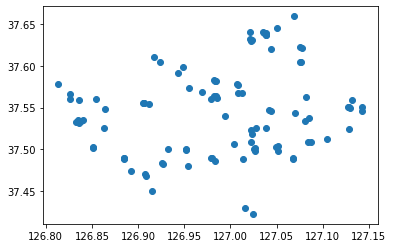

In [9]:
plt.scatter(meta['경도'], meta['위도'])

## 시간 단위 확인

In [10]:
# train: 2022-01-01 00:00 ~ 2022-03-31 23:00 => 90일
# test: 2022-04-01 00:00 ~ 2022-04-30 23:00 => 30일

train_start = datetime(2022,1,1,0,0)
train_end = datetime(2022,3,31,23,50)

train_time_list = []
for i in range(90*24*6):
    t = train_start + timedelta(minutes=i*10)
    print(t)
    train_time_list.append(t)


test_start = datetime(2022,4,1,0,0)
test_end = datetime(2022,4,30,23,0)

test_time_list = []
for i in range(30*24*6):
    t = test_start + timedelta(minutes=i*10)
    print(t)
    test_time_list.append(t)

2022-01-01 00:00:00
2022-01-01 00:10:00
2022-01-01 00:20:00
2022-01-01 00:30:00
2022-01-01 00:40:00
2022-01-01 00:50:00
2022-01-01 01:00:00
2022-01-01 01:10:00
2022-01-01 01:20:00
2022-01-01 01:30:00
2022-01-01 01:40:00
2022-01-01 01:50:00
2022-01-01 02:00:00
2022-01-01 02:10:00
2022-01-01 02:20:00
2022-01-01 02:30:00
2022-01-01 02:40:00
2022-01-01 02:50:00
2022-01-01 03:00:00
2022-01-01 03:10:00
2022-01-01 03:20:00
2022-01-01 03:30:00
2022-01-01 03:40:00
2022-01-01 03:50:00
2022-01-01 04:00:00
2022-01-01 04:10:00
2022-01-01 04:20:00
2022-01-01 04:30:00
2022-01-01 04:40:00
2022-01-01 04:50:00
2022-01-01 05:00:00
2022-01-01 05:10:00
2022-01-01 05:20:00
2022-01-01 05:30:00
2022-01-01 05:40:00
2022-01-01 05:50:00
2022-01-01 06:00:00
2022-01-01 06:10:00
2022-01-01 06:20:00
2022-01-01 06:30:00
2022-01-01 06:40:00
2022-01-01 06:50:00
2022-01-01 07:00:00
2022-01-01 07:10:00
2022-01-01 07:20:00
2022-01-01 07:30:00
2022-01-01 07:40:00
2022-01-01 07:50:00
2022-01-01 08:00:00
2022-01-01 08:10:00


In [11]:
# train test split
df_train = df[(df['날짜'] >= train_start) & (df['날짜'] <= train_end)]
df_test = df[(df['날짜'] >= test_start) & (df['날짜'] <= test_end)]

In [12]:
df_train

,사이트명,날짜,방문자수
59471,4027,2022-01-01 00:10:00,4
59472,4033,2022-01-01 00:10:00,5
59473,4041,2022-01-01 00:10:00,0
59474,4015,2022-01-01 00:10:00,12
59475,4031,2022-01-01 00:10:00,1
...,...,...,...
947887,4002,2022-03-31 23:20:00,0
947898,4002,2022-03-31 23:30:00,0
947906,4002,2022-03-31 23:40:00,0
947911,4002,2022-03-31 23:50:00,0


In [13]:
# 90*24*6 = 12960
temp = df_train.groupby(['사이트명']).count().reset_index()
site_list = temp.loc[temp['날짜']>=10000,'사이트명'].tolist()
df_train = df_train[df_train['사이트명'].isin(site_list)]

In [14]:
# 30*24*6 = 4320
temp = df_test.groupby(['사이트명']).count().reset_index()
site_list = temp.loc[temp['날짜']>=3000,'사이트명'].tolist()
df_test = df_test[df_test['사이트명'].isin(site_list)]

In [15]:
def fill_missing(df1, time_list):
    df2 = pd.DataFrame()

    for num in df1['사이트명'].unique():
        temp = df1[df1['사이트명']==num]
        df_time = pd.DataFrame({'날짜':time_list})
        temp2 = pd.merge(temp, df_time, on='날짜', how='right')
        temp2['사이트명'] = temp2['사이트명'].fillna(num)
        temp2 = temp2.drop_duplicates(['날짜'], keep='first')

        # 시계열 보간법으로 방문자수 결측값 채우기
        try:
            temp2['방문자수'] = pd.Series(temp2['방문자수'].tolist(), index=temp2['방문자수']).interpolate(method='time').tolist()
        except:
            temp2['방문자수'] = temp2['방문자수'].ffill()
#             temp2['방문자수'] = temp2['방문자수'].bfill()

        temp2['방문자수'] = temp2['방문자수'].ffill()
        temp2['방문자수'] = temp2['방문자수'].bfill()
        df2 = pd.concat([df2, temp2], axis=0)
    df2 = df2.dropna()
    return df2

In [16]:
# 결측치가 존재한다면 보간법으로 채우기
df_train1 = fill_missing(df_train, train_time_list)
df_test1 = fill_missing(df_test, test_time_list)

## 30분 단위로 subsampling

In [17]:
df_train2 = df_train1[(df_train1['날짜'].dt.minute == 0)|(df_train1['날짜'].dt.minute == 30)]
df_test2 = df_test1[(df_test1['날짜'].dt.minute == 0)|(df_test1['날짜'].dt.minute == 30)]

## 위치정보와 합치기

In [18]:
df_train3 = pd.merge(df_train2, meta, on=['사이트명'], how='left')
df_train3 = df_train3.dropna()

df_test3 = pd.merge(df_test2, meta, on=['사이트명'], how='left')
df_test3 = df_test3.dropna()

In [19]:
df_train3

,사이트명,날짜,방문자수,위도,경도
0,4027.0,2022-01-01 00:00:00,9.0,37.560536,126.854707
1,4027.0,2022-01-01 00:30:00,3.0,37.560536,126.854707
2,4027.0,2022-01-01 01:00:00,6.0,37.560536,126.854707
3,4027.0,2022-01-01 01:30:00,1.0,37.560536,126.854707
4,4027.0,2022-01-01 02:00:00,4.0,37.560536,126.854707
...,...,...,...,...,...
207355,4051.0,2022-03-31 21:30:00,25.0,37.550701,127.143013
207356,4051.0,2022-03-31 22:00:00,18.0,37.550701,127.143013
207357,4051.0,2022-03-31 22:30:00,33.0,37.550701,127.143013
207358,4051.0,2022-03-31 23:00:00,20.0,37.550701,127.143013


In [20]:
df_train3.to_csv('df_train_pop.csv', index=False)
df_test3.to_csv('df_test_pop.csv', index=False)

In [21]:
max_lat = df_train3['위도'].max() ; print(max_lat)
min_lat = df_train3['위도'].min() ; print(min_lat)
unit_lat = (max_lat - min_lat)/10 ; print(unit_lat)

37.64583144
37.42201307
0.02238183700000036


In [22]:
max_long = df_train3['경도'].max() ; print(max_long)
min_long = df_train3['경도'].min(); print(min_long)
unit_long = (max_long - min_long)/20 ; print(unit_long)

127.1430179
126.8133372
0.016484034999999862


In [23]:
lat_list = []
lat = min_lat
for _ in range(11):
    lat_list.append(lat)
    lat += unit_lat
print(lat_list)

long_list = []
long = min_long
for _ in range(21):
    long_list.append(long)
    long += unit_long
print(long_list)

[37.42201307, 37.444394906999996, 37.46677674399999, 37.48915858099999, 37.51154041799999, 37.533922254999986, 37.55630409199998, 37.57868592899998, 37.60106776599998, 37.623449602999976, 37.645831439999974]
[126.8133372, 126.82982123500001, 126.84630527000002, 126.86278930500002, 126.87927334000003, 126.89575737500003, 126.91224141000004, 126.92872544500004, 126.94520948000005, 126.96169351500005, 126.97817755000005, 126.99466158500006, 127.01114562000006, 127.02762965500007, 127.04411369000007, 127.06059772500008, 127.07708176000008, 127.09356579500009, 127.1100498300001, 127.1265338650001, 127.1430179000001]


In [24]:
df_train = df_train3.copy()
num_days = 90
num_30mins = 2 * 24 * num_days

train_image = np.zeros(shape=(num_30mins,10,20))

for k in range(num_30mins):
    target_datetime = train_start + timedelta(minutes=k*30)
    print(target_datetime)
    tmp = df_train[df_train['날짜'] == target_datetime]
    
    for i in range(10):
        a = (tmp['위도'] >= lat_list[i]) & (tmp['위도'] <= lat_list[i+1])
        
        for j in range(20):
            b = (tmp['경도'] >= long_list[j]) & (tmp['경도'] <= long_list[j+1])
            if len(tmp.loc[a&b,'방문자수']) > 0:
                val = tmp.loc[a&b,'방문자수'].mean()
                train_image[k][i][j] = val

2022-01-01 00:00:00
2022-01-01 00:30:00
2022-01-01 01:00:00
2022-01-01 01:30:00
2022-01-01 02:00:00
2022-01-01 02:30:00
2022-01-01 03:00:00
2022-01-01 03:30:00
2022-01-01 04:00:00
2022-01-01 04:30:00
2022-01-01 05:00:00
2022-01-01 05:30:00
2022-01-01 06:00:00
2022-01-01 06:30:00
2022-01-01 07:00:00
2022-01-01 07:30:00
2022-01-01 08:00:00
2022-01-01 08:30:00
2022-01-01 09:00:00
2022-01-01 09:30:00
2022-01-01 10:00:00
2022-01-01 10:30:00
2022-01-01 11:00:00
2022-01-01 11:30:00
2022-01-01 12:00:00
2022-01-01 12:30:00
2022-01-01 13:00:00
2022-01-01 13:30:00
2022-01-01 14:00:00
2022-01-01 14:30:00
2022-01-01 15:00:00
2022-01-01 15:30:00
2022-01-01 16:00:00
2022-01-01 16:30:00
2022-01-01 17:00:00
2022-01-01 17:30:00
2022-01-01 18:00:00
2022-01-01 18:30:00
2022-01-01 19:00:00
2022-01-01 19:30:00
2022-01-01 20:00:00
2022-01-01 20:30:00
2022-01-01 21:00:00
2022-01-01 21:30:00
2022-01-01 22:00:00
2022-01-01 22:30:00
2022-01-01 23:00:00
2022-01-01 23:30:00
2022-01-02 00:00:00
2022-01-02 00:30:00


2022-01-09 14:30:00
2022-01-09 15:00:00
2022-01-09 15:30:00
2022-01-09 16:00:00
2022-01-09 16:30:00
2022-01-09 17:00:00
2022-01-09 17:30:00
2022-01-09 18:00:00
2022-01-09 18:30:00
2022-01-09 19:00:00
2022-01-09 19:30:00
2022-01-09 20:00:00
2022-01-09 20:30:00
2022-01-09 21:00:00
2022-01-09 21:30:00
2022-01-09 22:00:00
2022-01-09 22:30:00
2022-01-09 23:00:00
2022-01-09 23:30:00
2022-01-10 00:00:00
2022-01-10 00:30:00
2022-01-10 01:00:00
2022-01-10 01:30:00
2022-01-10 02:00:00
2022-01-10 02:30:00
2022-01-10 03:00:00
2022-01-10 03:30:00
2022-01-10 04:00:00
2022-01-10 04:30:00
2022-01-10 05:00:00
2022-01-10 05:30:00
2022-01-10 06:00:00
2022-01-10 06:30:00
2022-01-10 07:00:00
2022-01-10 07:30:00
2022-01-10 08:00:00
2022-01-10 08:30:00
2022-01-10 09:00:00
2022-01-10 09:30:00
2022-01-10 10:00:00
2022-01-10 10:30:00
2022-01-10 11:00:00
2022-01-10 11:30:00
2022-01-10 12:00:00
2022-01-10 12:30:00
2022-01-10 13:00:00
2022-01-10 13:30:00
2022-01-10 14:00:00
2022-01-10 14:30:00
2022-01-10 15:00:00


2022-01-18 03:30:00
2022-01-18 04:00:00
2022-01-18 04:30:00
2022-01-18 05:00:00
2022-01-18 05:30:00
2022-01-18 06:00:00
2022-01-18 06:30:00
2022-01-18 07:00:00
2022-01-18 07:30:00
2022-01-18 08:00:00
2022-01-18 08:30:00
2022-01-18 09:00:00
2022-01-18 09:30:00
2022-01-18 10:00:00
2022-01-18 10:30:00
2022-01-18 11:00:00
2022-01-18 11:30:00
2022-01-18 12:00:00
2022-01-18 12:30:00
2022-01-18 13:00:00
2022-01-18 13:30:00
2022-01-18 14:00:00
2022-01-18 14:30:00
2022-01-18 15:00:00
2022-01-18 15:30:00
2022-01-18 16:00:00
2022-01-18 16:30:00
2022-01-18 17:00:00
2022-01-18 17:30:00
2022-01-18 18:00:00
2022-01-18 18:30:00
2022-01-18 19:00:00
2022-01-18 19:30:00
2022-01-18 20:00:00
2022-01-18 20:30:00
2022-01-18 21:00:00
2022-01-18 21:30:00
2022-01-18 22:00:00
2022-01-18 22:30:00
2022-01-18 23:00:00
2022-01-18 23:30:00
2022-01-19 00:00:00
2022-01-19 00:30:00
2022-01-19 01:00:00
2022-01-19 01:30:00
2022-01-19 02:00:00
2022-01-19 02:30:00
2022-01-19 03:00:00
2022-01-19 03:30:00
2022-01-19 04:00:00


2022-01-26 17:30:00
2022-01-26 18:00:00
2022-01-26 18:30:00
2022-01-26 19:00:00
2022-01-26 19:30:00
2022-01-26 20:00:00
2022-01-26 20:30:00
2022-01-26 21:00:00
2022-01-26 21:30:00
2022-01-26 22:00:00
2022-01-26 22:30:00
2022-01-26 23:00:00
2022-01-26 23:30:00
2022-01-27 00:00:00
2022-01-27 00:30:00
2022-01-27 01:00:00
2022-01-27 01:30:00
2022-01-27 02:00:00
2022-01-27 02:30:00
2022-01-27 03:00:00
2022-01-27 03:30:00
2022-01-27 04:00:00
2022-01-27 04:30:00
2022-01-27 05:00:00
2022-01-27 05:30:00
2022-01-27 06:00:00
2022-01-27 06:30:00
2022-01-27 07:00:00
2022-01-27 07:30:00
2022-01-27 08:00:00
2022-01-27 08:30:00
2022-01-27 09:00:00
2022-01-27 09:30:00
2022-01-27 10:00:00
2022-01-27 10:30:00
2022-01-27 11:00:00
2022-01-27 11:30:00
2022-01-27 12:00:00
2022-01-27 12:30:00
2022-01-27 13:00:00
2022-01-27 13:30:00
2022-01-27 14:00:00
2022-01-27 14:30:00
2022-01-27 15:00:00
2022-01-27 15:30:00
2022-01-27 16:00:00
2022-01-27 16:30:00
2022-01-27 17:00:00
2022-01-27 17:30:00
2022-01-27 18:00:00


2022-02-04 07:00:00
2022-02-04 07:30:00
2022-02-04 08:00:00
2022-02-04 08:30:00
2022-02-04 09:00:00
2022-02-04 09:30:00
2022-02-04 10:00:00
2022-02-04 10:30:00
2022-02-04 11:00:00
2022-02-04 11:30:00
2022-02-04 12:00:00
2022-02-04 12:30:00
2022-02-04 13:00:00
2022-02-04 13:30:00
2022-02-04 14:00:00
2022-02-04 14:30:00
2022-02-04 15:00:00
2022-02-04 15:30:00
2022-02-04 16:00:00
2022-02-04 16:30:00
2022-02-04 17:00:00
2022-02-04 17:30:00
2022-02-04 18:00:00
2022-02-04 18:30:00
2022-02-04 19:00:00
2022-02-04 19:30:00
2022-02-04 20:00:00
2022-02-04 20:30:00
2022-02-04 21:00:00
2022-02-04 21:30:00
2022-02-04 22:00:00
2022-02-04 22:30:00
2022-02-04 23:00:00
2022-02-04 23:30:00
2022-02-05 00:00:00
2022-02-05 00:30:00
2022-02-05 01:00:00
2022-02-05 01:30:00
2022-02-05 02:00:00
2022-02-05 02:30:00
2022-02-05 03:00:00
2022-02-05 03:30:00
2022-02-05 04:00:00
2022-02-05 04:30:00
2022-02-05 05:00:00
2022-02-05 05:30:00
2022-02-05 06:00:00
2022-02-05 06:30:00
2022-02-05 07:00:00
2022-02-05 07:30:00


2022-02-12 20:30:00
2022-02-12 21:00:00
2022-02-12 21:30:00
2022-02-12 22:00:00
2022-02-12 22:30:00
2022-02-12 23:00:00
2022-02-12 23:30:00
2022-02-13 00:00:00
2022-02-13 00:30:00
2022-02-13 01:00:00
2022-02-13 01:30:00
2022-02-13 02:00:00
2022-02-13 02:30:00
2022-02-13 03:00:00
2022-02-13 03:30:00
2022-02-13 04:00:00
2022-02-13 04:30:00
2022-02-13 05:00:00
2022-02-13 05:30:00
2022-02-13 06:00:00
2022-02-13 06:30:00
2022-02-13 07:00:00
2022-02-13 07:30:00
2022-02-13 08:00:00
2022-02-13 08:30:00
2022-02-13 09:00:00
2022-02-13 09:30:00
2022-02-13 10:00:00
2022-02-13 10:30:00
2022-02-13 11:00:00
2022-02-13 11:30:00
2022-02-13 12:00:00
2022-02-13 12:30:00
2022-02-13 13:00:00
2022-02-13 13:30:00
2022-02-13 14:00:00
2022-02-13 14:30:00
2022-02-13 15:00:00
2022-02-13 15:30:00
2022-02-13 16:00:00
2022-02-13 16:30:00
2022-02-13 17:00:00
2022-02-13 17:30:00
2022-02-13 18:00:00
2022-02-13 18:30:00
2022-02-13 19:00:00
2022-02-13 19:30:00
2022-02-13 20:00:00
2022-02-13 20:30:00
2022-02-13 21:00:00


2022-02-21 10:30:00
2022-02-21 11:00:00
2022-02-21 11:30:00
2022-02-21 12:00:00
2022-02-21 12:30:00
2022-02-21 13:00:00
2022-02-21 13:30:00
2022-02-21 14:00:00
2022-02-21 14:30:00
2022-02-21 15:00:00
2022-02-21 15:30:00
2022-02-21 16:00:00
2022-02-21 16:30:00
2022-02-21 17:00:00
2022-02-21 17:30:00
2022-02-21 18:00:00
2022-02-21 18:30:00
2022-02-21 19:00:00
2022-02-21 19:30:00
2022-02-21 20:00:00
2022-02-21 20:30:00
2022-02-21 21:00:00
2022-02-21 21:30:00
2022-02-21 22:00:00
2022-02-21 22:30:00
2022-02-21 23:00:00
2022-02-21 23:30:00
2022-02-22 00:00:00
2022-02-22 00:30:00
2022-02-22 01:00:00
2022-02-22 01:30:00
2022-02-22 02:00:00
2022-02-22 02:30:00
2022-02-22 03:00:00
2022-02-22 03:30:00
2022-02-22 04:00:00
2022-02-22 04:30:00
2022-02-22 05:00:00
2022-02-22 05:30:00
2022-02-22 06:00:00
2022-02-22 06:30:00
2022-02-22 07:00:00
2022-02-22 07:30:00
2022-02-22 08:00:00
2022-02-22 08:30:00
2022-02-22 09:00:00
2022-02-22 09:30:00
2022-02-22 10:00:00
2022-02-22 10:30:00
2022-02-22 11:00:00


2022-03-02 00:00:00
2022-03-02 00:30:00
2022-03-02 01:00:00
2022-03-02 01:30:00
2022-03-02 02:00:00
2022-03-02 02:30:00
2022-03-02 03:00:00
2022-03-02 03:30:00
2022-03-02 04:00:00
2022-03-02 04:30:00
2022-03-02 05:00:00
2022-03-02 05:30:00
2022-03-02 06:00:00
2022-03-02 06:30:00
2022-03-02 07:00:00
2022-03-02 07:30:00
2022-03-02 08:00:00
2022-03-02 08:30:00
2022-03-02 09:00:00
2022-03-02 09:30:00
2022-03-02 10:00:00
2022-03-02 10:30:00
2022-03-02 11:00:00
2022-03-02 11:30:00
2022-03-02 12:00:00
2022-03-02 12:30:00
2022-03-02 13:00:00
2022-03-02 13:30:00
2022-03-02 14:00:00
2022-03-02 14:30:00
2022-03-02 15:00:00
2022-03-02 15:30:00
2022-03-02 16:00:00
2022-03-02 16:30:00
2022-03-02 17:00:00
2022-03-02 17:30:00
2022-03-02 18:00:00
2022-03-02 18:30:00
2022-03-02 19:00:00
2022-03-02 19:30:00
2022-03-02 20:00:00
2022-03-02 20:30:00
2022-03-02 21:00:00
2022-03-02 21:30:00
2022-03-02 22:00:00
2022-03-02 22:30:00
2022-03-02 23:00:00
2022-03-02 23:30:00
2022-03-03 00:00:00
2022-03-03 00:30:00


2022-03-10 13:30:00
2022-03-10 14:00:00
2022-03-10 14:30:00
2022-03-10 15:00:00
2022-03-10 15:30:00
2022-03-10 16:00:00
2022-03-10 16:30:00
2022-03-10 17:00:00
2022-03-10 17:30:00
2022-03-10 18:00:00
2022-03-10 18:30:00
2022-03-10 19:00:00
2022-03-10 19:30:00
2022-03-10 20:00:00
2022-03-10 20:30:00
2022-03-10 21:00:00
2022-03-10 21:30:00
2022-03-10 22:00:00
2022-03-10 22:30:00
2022-03-10 23:00:00
2022-03-10 23:30:00
2022-03-11 00:00:00
2022-03-11 00:30:00
2022-03-11 01:00:00
2022-03-11 01:30:00
2022-03-11 02:00:00
2022-03-11 02:30:00
2022-03-11 03:00:00
2022-03-11 03:30:00
2022-03-11 04:00:00
2022-03-11 04:30:00
2022-03-11 05:00:00
2022-03-11 05:30:00
2022-03-11 06:00:00
2022-03-11 06:30:00
2022-03-11 07:00:00
2022-03-11 07:30:00
2022-03-11 08:00:00
2022-03-11 08:30:00
2022-03-11 09:00:00
2022-03-11 09:30:00
2022-03-11 10:00:00
2022-03-11 10:30:00
2022-03-11 11:00:00
2022-03-11 11:30:00
2022-03-11 12:00:00
2022-03-11 12:30:00
2022-03-11 13:00:00
2022-03-11 13:30:00
2022-03-11 14:00:00


2022-03-19 03:00:00
2022-03-19 03:30:00
2022-03-19 04:00:00
2022-03-19 04:30:00
2022-03-19 05:00:00
2022-03-19 05:30:00
2022-03-19 06:00:00
2022-03-19 06:30:00
2022-03-19 07:00:00
2022-03-19 07:30:00
2022-03-19 08:00:00
2022-03-19 08:30:00
2022-03-19 09:00:00
2022-03-19 09:30:00
2022-03-19 10:00:00
2022-03-19 10:30:00
2022-03-19 11:00:00
2022-03-19 11:30:00
2022-03-19 12:00:00
2022-03-19 12:30:00
2022-03-19 13:00:00
2022-03-19 13:30:00
2022-03-19 14:00:00
2022-03-19 14:30:00
2022-03-19 15:00:00
2022-03-19 15:30:00
2022-03-19 16:00:00
2022-03-19 16:30:00
2022-03-19 17:00:00
2022-03-19 17:30:00
2022-03-19 18:00:00
2022-03-19 18:30:00
2022-03-19 19:00:00
2022-03-19 19:30:00
2022-03-19 20:00:00
2022-03-19 20:30:00
2022-03-19 21:00:00
2022-03-19 21:30:00
2022-03-19 22:00:00
2022-03-19 22:30:00
2022-03-19 23:00:00
2022-03-19 23:30:00
2022-03-20 00:00:00
2022-03-20 00:30:00
2022-03-20 01:00:00
2022-03-20 01:30:00
2022-03-20 02:00:00
2022-03-20 02:30:00
2022-03-20 03:00:00
2022-03-20 03:30:00


2022-03-27 16:30:00
2022-03-27 17:00:00
2022-03-27 17:30:00
2022-03-27 18:00:00
2022-03-27 18:30:00
2022-03-27 19:00:00
2022-03-27 19:30:00
2022-03-27 20:00:00
2022-03-27 20:30:00
2022-03-27 21:00:00
2022-03-27 21:30:00
2022-03-27 22:00:00
2022-03-27 22:30:00
2022-03-27 23:00:00
2022-03-27 23:30:00
2022-03-28 00:00:00
2022-03-28 00:30:00
2022-03-28 01:00:00
2022-03-28 01:30:00
2022-03-28 02:00:00
2022-03-28 02:30:00
2022-03-28 03:00:00
2022-03-28 03:30:00
2022-03-28 04:00:00
2022-03-28 04:30:00
2022-03-28 05:00:00
2022-03-28 05:30:00
2022-03-28 06:00:00
2022-03-28 06:30:00
2022-03-28 07:00:00
2022-03-28 07:30:00
2022-03-28 08:00:00
2022-03-28 08:30:00
2022-03-28 09:00:00
2022-03-28 09:30:00
2022-03-28 10:00:00
2022-03-28 10:30:00
2022-03-28 11:00:00
2022-03-28 11:30:00
2022-03-28 12:00:00
2022-03-28 12:30:00
2022-03-28 13:00:00
2022-03-28 13:30:00
2022-03-28 14:00:00
2022-03-28 14:30:00
2022-03-28 15:00:00
2022-03-28 15:30:00
2022-03-28 16:00:00
2022-03-28 16:30:00
2022-03-28 17:00:00


In [25]:
df_test = df_test3.copy()
num_days = 30
num_30mins = 2 * 24 * num_days

test_image = np.zeros(shape=(num_30mins,10,20))

for k in range(num_30mins):
    target_datetime = test_start + timedelta(minutes=k*30)
    print(target_datetime)
    tmp = df_test[df_test['날짜'] == target_datetime]
    
    for i in range(10):
        a = (tmp['위도'] >= lat_list[i]) & (tmp['위도'] <= lat_list[i+1])
        
        for j in range(20):
            b = (tmp['경도'] >= long_list[j]) & (tmp['경도'] <= long_list[j+1])
            if len(tmp.loc[a&b,'방문자수']) > 0:
                val = tmp.loc[a&b,'방문자수'].mean()
                test_image[k][i][j] = val

2022-04-01 00:00:00
2022-04-01 00:30:00
2022-04-01 01:00:00
2022-04-01 01:30:00
2022-04-01 02:00:00
2022-04-01 02:30:00
2022-04-01 03:00:00
2022-04-01 03:30:00
2022-04-01 04:00:00
2022-04-01 04:30:00
2022-04-01 05:00:00
2022-04-01 05:30:00
2022-04-01 06:00:00
2022-04-01 06:30:00
2022-04-01 07:00:00
2022-04-01 07:30:00
2022-04-01 08:00:00
2022-04-01 08:30:00
2022-04-01 09:00:00
2022-04-01 09:30:00
2022-04-01 10:00:00
2022-04-01 10:30:00
2022-04-01 11:00:00
2022-04-01 11:30:00
2022-04-01 12:00:00
2022-04-01 12:30:00
2022-04-01 13:00:00
2022-04-01 13:30:00
2022-04-01 14:00:00
2022-04-01 14:30:00
2022-04-01 15:00:00
2022-04-01 15:30:00
2022-04-01 16:00:00
2022-04-01 16:30:00
2022-04-01 17:00:00
2022-04-01 17:30:00
2022-04-01 18:00:00
2022-04-01 18:30:00
2022-04-01 19:00:00
2022-04-01 19:30:00
2022-04-01 20:00:00
2022-04-01 20:30:00
2022-04-01 21:00:00
2022-04-01 21:30:00
2022-04-01 22:00:00
2022-04-01 22:30:00
2022-04-01 23:00:00
2022-04-01 23:30:00
2022-04-02 00:00:00
2022-04-02 00:30:00


2022-04-09 13:00:00
2022-04-09 13:30:00
2022-04-09 14:00:00
2022-04-09 14:30:00
2022-04-09 15:00:00
2022-04-09 15:30:00
2022-04-09 16:00:00
2022-04-09 16:30:00
2022-04-09 17:00:00
2022-04-09 17:30:00
2022-04-09 18:00:00
2022-04-09 18:30:00
2022-04-09 19:00:00
2022-04-09 19:30:00
2022-04-09 20:00:00
2022-04-09 20:30:00
2022-04-09 21:00:00
2022-04-09 21:30:00
2022-04-09 22:00:00
2022-04-09 22:30:00
2022-04-09 23:00:00
2022-04-09 23:30:00
2022-04-10 00:00:00
2022-04-10 00:30:00
2022-04-10 01:00:00
2022-04-10 01:30:00
2022-04-10 02:00:00
2022-04-10 02:30:00
2022-04-10 03:00:00
2022-04-10 03:30:00
2022-04-10 04:00:00
2022-04-10 04:30:00
2022-04-10 05:00:00
2022-04-10 05:30:00
2022-04-10 06:00:00
2022-04-10 06:30:00
2022-04-10 07:00:00
2022-04-10 07:30:00
2022-04-10 08:00:00
2022-04-10 08:30:00
2022-04-10 09:00:00
2022-04-10 09:30:00
2022-04-10 10:00:00
2022-04-10 10:30:00
2022-04-10 11:00:00
2022-04-10 11:30:00
2022-04-10 12:00:00
2022-04-10 12:30:00
2022-04-10 13:00:00
2022-04-10 13:30:00


2022-04-18 03:00:00
2022-04-18 03:30:00
2022-04-18 04:00:00
2022-04-18 04:30:00
2022-04-18 05:00:00
2022-04-18 05:30:00
2022-04-18 06:00:00
2022-04-18 06:30:00
2022-04-18 07:00:00
2022-04-18 07:30:00
2022-04-18 08:00:00
2022-04-18 08:30:00
2022-04-18 09:00:00
2022-04-18 09:30:00
2022-04-18 10:00:00
2022-04-18 10:30:00
2022-04-18 11:00:00
2022-04-18 11:30:00
2022-04-18 12:00:00
2022-04-18 12:30:00
2022-04-18 13:00:00
2022-04-18 13:30:00
2022-04-18 14:00:00
2022-04-18 14:30:00
2022-04-18 15:00:00
2022-04-18 15:30:00
2022-04-18 16:00:00
2022-04-18 16:30:00
2022-04-18 17:00:00
2022-04-18 17:30:00
2022-04-18 18:00:00
2022-04-18 18:30:00
2022-04-18 19:00:00
2022-04-18 19:30:00
2022-04-18 20:00:00
2022-04-18 20:30:00
2022-04-18 21:00:00
2022-04-18 21:30:00
2022-04-18 22:00:00
2022-04-18 22:30:00
2022-04-18 23:00:00
2022-04-18 23:30:00
2022-04-19 00:00:00
2022-04-19 00:30:00
2022-04-19 01:00:00
2022-04-19 01:30:00
2022-04-19 02:00:00
2022-04-19 02:30:00
2022-04-19 03:00:00
2022-04-19 03:30:00


2022-04-26 16:00:00
2022-04-26 16:30:00
2022-04-26 17:00:00
2022-04-26 17:30:00
2022-04-26 18:00:00
2022-04-26 18:30:00
2022-04-26 19:00:00
2022-04-26 19:30:00
2022-04-26 20:00:00
2022-04-26 20:30:00
2022-04-26 21:00:00
2022-04-26 21:30:00
2022-04-26 22:00:00
2022-04-26 22:30:00
2022-04-26 23:00:00
2022-04-26 23:30:00
2022-04-27 00:00:00
2022-04-27 00:30:00
2022-04-27 01:00:00
2022-04-27 01:30:00
2022-04-27 02:00:00
2022-04-27 02:30:00
2022-04-27 03:00:00
2022-04-27 03:30:00
2022-04-27 04:00:00
2022-04-27 04:30:00
2022-04-27 05:00:00
2022-04-27 05:30:00
2022-04-27 06:00:00
2022-04-27 06:30:00
2022-04-27 07:00:00
2022-04-27 07:30:00
2022-04-27 08:00:00
2022-04-27 08:30:00
2022-04-27 09:00:00
2022-04-27 09:30:00
2022-04-27 10:00:00
2022-04-27 10:30:00
2022-04-27 11:00:00
2022-04-27 11:30:00
2022-04-27 12:00:00
2022-04-27 12:30:00
2022-04-27 13:00:00
2022-04-27 13:30:00
2022-04-27 14:00:00
2022-04-27 14:30:00
2022-04-27 15:00:00
2022-04-27 15:30:00
2022-04-27 16:00:00
2022-04-27 16:30:00


In [26]:
print(train_image.shape)
print(test_image.shape)

(4320, 10, 20)
(1440, 10, 20)


In [27]:
train_image_new = train_image.copy()
for i in range(10):
    train_image_new[:,i,:] = train_image[:,9-i,:]

In [28]:
train_image = train_image_new.copy()

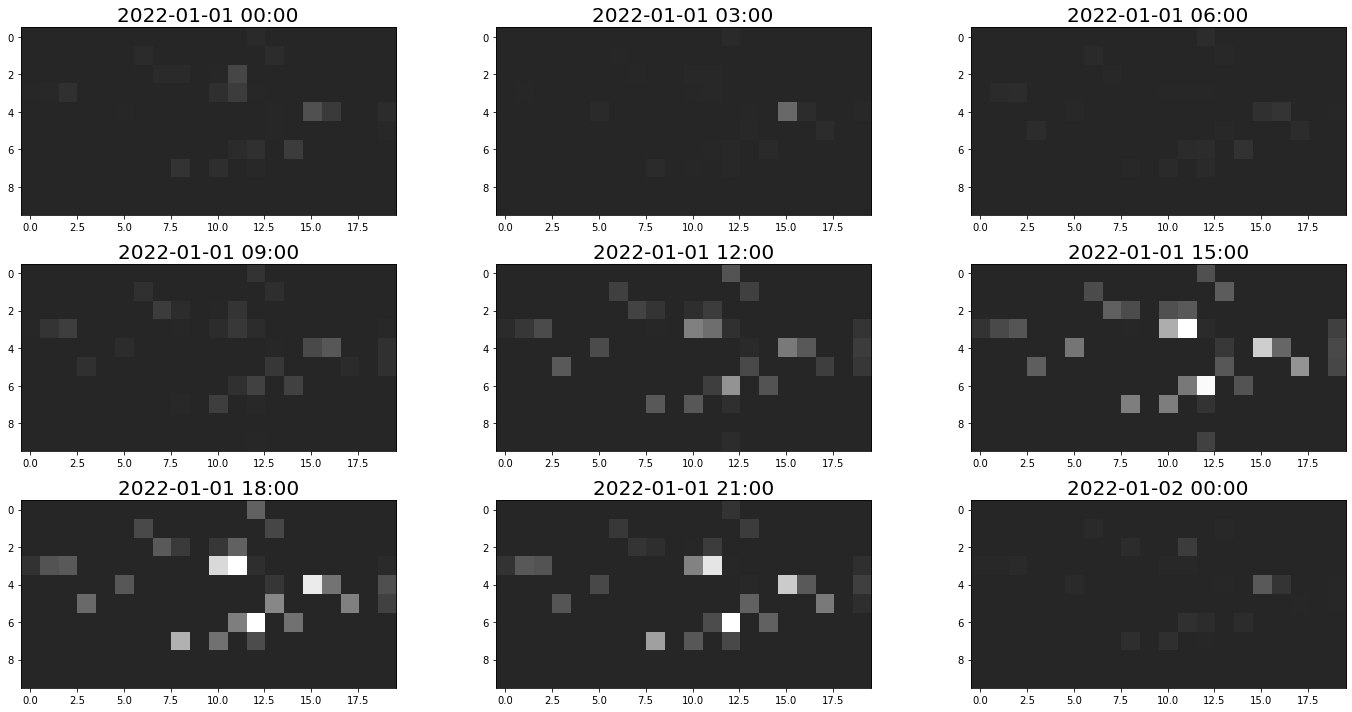

In [29]:
# vmax = train_image[0:48].max() # 252
vmax = 200
c = 30

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(20,10))

ax1.imshow(train_image[0][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 00:00
ax1.set_title('2022-01-01 00:00', fontsize=20)

ax2.imshow(train_image[6][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 03:00
ax2.set_title('2022-01-01 03:00', fontsize=20)

ax3.imshow(train_image[12][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 06:00
ax3.set_title('2022-01-01 06:00', fontsize=20)

ax4.imshow(train_image[18][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 09:00
ax4.set_title('2022-01-01 09:00', fontsize=20)

ax5.imshow(train_image[24][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 12:00
ax5.set_title('2022-01-01 12:00', fontsize=20)

ax6.imshow(train_image[30][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 15:00
ax6.set_title('2022-01-01 15:00', fontsize=20)

ax7.imshow(train_image[36][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 18:00
ax7.set_title('2022-01-01 18:00', fontsize=20)

ax8.imshow(train_image[42][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 21:00
ax8.set_title('2022-01-01 21:00', fontsize=20)

ax9.imshow(train_image[48][:][:] + c, cmap='gray', vmin=0, vmax=vmax) # 24:00
ax9.set_title('2022-01-02 00:00', fontsize=20)

plt.tight_layout()
plt.show()

In [27]:
np.save('./data_preprocessed/train_image_pop', train_image)

In [28]:
np.save('./data_preprocessed/test_image_pop', test_image)